<a href="https://colab.research.google.com/github/rohitgkr/MachineLearning/blob/main/Insurance_Underwriter_v2_DecisionTree_MPL_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook applies decision tree analysis over historical quote processing by brokerage and underwriter. The aim is to extract business rule boundary conditions based on multiple dimensions to better predict the best resource and processing efficiency for a booking risk assessment.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
import matplotlib.pyplot as plt

file_path = "/content/drive/MyDrive/data/Underwriter_strings.csv"
df = pd.read_csv(file_path)


## Target and feature columns

### Drop columns:
EPI Gross & Operating Territory

In [ ]:
df.drop(columns=["EPI Gross", "Operating Territory"], inplace=True)

In [ ]:
# target (column A) and features (all others)
target_col = df.columns[0]
y = df[target_col]
X = df.drop(columns=[target_col])

## Pre-processing

Cleanup numeric columns

In [ ]:

# Clean 'Limit' and 'EPI Gross' columns
for col in ['Limit', 'EPI Gross']:
    if col in X.columns:
        # Remove commas and convert to numeric, errors -> NaN
        X[col] = pd.to_numeric(X[col].astype(str).str.replace(',', ''), errors='coerce')
        # NaN -> 0
        X[col] = X[col].fillna(0)

Categorical columns

In [ ]:

#  categorical columns to One-Hot Encode
categorical_features = [
    'Broker Grouping',      # Column A
    'Minor Class',            # Column B
    'Operating Territory',           # Column C - Added Entity to categorical columns
    'Renewal Ind'
    ]

# verify  columns exist
missing = set(categorical_features) - set(X.columns)
if missing:
    raise KeyError(f"Missing expected categorical columns: {missing}")

KeyError: "Missing expected categorical columns: {'Operating Territory'}"

In [ ]:
categorical_features

['Broker Grouping', 'Minor Class', 'Operating Territory', 'Renewal Ind']

Numeric columns

In [ ]:
numeric_features = [col for col in X.columns if col not in categorical_features]

In [ ]:
numeric_features

['EPI Gross', 'Limit']

## Exploratory data analysis

### Value Counts & purging for split


#### Underwriter value counts

In [ ]:
vc = y.value_counts()
vc

,count
Underwriter,
Matthew Brooke,645
Tim Woodhouse,620
Rahul Shah,597
Sadia Hayek,485
Jack Matthews,426
Hui Zhi Pek,395
Kyle Rogers,336
Chloe Gordge,332
Paul Smith,281


#### Broker Grouping value counts

In [ ]:
result = X['Broker Grouping'].value_counts()
pd.set_option('display.max_rows', None)
display(result)
pd.reset_option('display.max_rows')

,count
Broker Grouping,
MARSH,610
HOWDEN,500
AON,479
WILLIS,343
ARTHUR,295
LOCKTON,285
CHEDID,267
PRICE,211
AMWINS,112


In [ ]:
X['EPI Gross'].value_counts()

,count
EPI Gross,
0,3104
15000,13
5000,11
7500,10
30000,9
...,...
2240,1
2048850,1
234612,1


In [ ]:
X['Limit'].value_counts()

,count
Limit,
0.000000e+00,2707
1.000000e+06,154
1.000000e+08,147
5.000000e+07,131
5.000000e+08,126
...,...
3.291794e+08,1
2.999644e+08,1
3.761580e+08,1


#### Operating terriroty

In [ ]:
result = X['Operating Territory'].value_counts()
pd.set_option('display.max_rows', None)
display(result)
pd.reset_option('display.max_rows')

,count
Operating Territory,
UnKnown,2680
India,235
United Kingdom,207
California,139
New York,83
South Africa,83
Pakistan,79
United Arab Emirates,72
Texas,43


### Broker Group assignments by Underwriter

In [ ]:
result = (
    df.groupby(['Underwriter', 'Broker Grouping'])
      .size()                          # count rows in each combination
      .reset_index(name='Count')       # turn it back into a DataFrame
      .sort_values(by=['Underwriter', 'Broker Grouping'])  # sort alphabetically by Underwriter, then Broker Group
)

# Temporarily set display option to show all rows
pd.set_option('display.max_rows', None)

display(result)

# Reset display option to default
pd.reset_option('display.max_rows')

,Underwriter,Broker Grouping,Count
0,Andrew Umphress,ACRISURE,1
1,Andrew Umphress,ALLIANT,8
2,Andrew Umphress,AMWINS,45
3,Andrew Umphress,AON,5
4,Andrew Umphress,APEX,4
5,Andrew Umphress,ARTHUR,2
6,Andrew Umphress,BMS,1
7,Andrew Umphress,BROWN,12
8,Andrew Umphress,CCIG,1
9,Andrew Umphress,CRC,4


### Underwriter assignment by Broker Grouping & Operating Territory

In [ ]:
# Filter dataset to underwriter counts grouped by Broker Grouping further by Operating Territory
result = (
    df.groupby(['Underwriter', 'Broker Grouping', 'Operating Territory'])
      .size()                          # count rows in each combination
      .reset_index(name='Count')       # turn it back into a DataFrame
      .sort_values(by=['Underwriter', 'Count', 'Broker Grouping', 'Operating Territory'], ascending=[True, False, True, True])  # sort alphabetically by Underwriter, then by Count descending, then by Broker Grouping and Operating Territory ascending
)

# Temporarily set display option to show all rows
pd.set_option('display.max_rows', None)

display(result)

# Reset display option to default
pd.reset_option('display.max_rows')

,Underwriter,Broker Grouping,Operating Territory,Count
18,Andrew Umphress,AMWINS,UnKnown,26
73,Andrew Umphress,RT,UnKnown,25
37,Andrew Umphress,HUB,UnKnown,20
78,Andrew Umphress,STERLING,UnKnown,13
58,Andrew Umphress,RISK,UnKnown,12
28,Andrew Umphress,BROWN,UnKnown,10
88,Andrew Umphress,WILLIS,UnKnown,8
40,Andrew Umphress,IMA,UnKnown,7
36,Andrew Umphress,HUB,New York,6
77,Andrew Umphress,STERLING,New York,6


### Underwriter assignments by Operating Territory

In [ ]:
# underwriter counts grouped by Operating Territory further by Underwriter
result = (
    df.groupby(['Operating Territory', 'Underwriter'])
      .size()                          # count rows in each combination
      .reset_index(name='Count')       # turn it back into a DataFrame
      .sort_values(by=['Operating Territory', 'Count'], ascending=[True, False])  # sort alphabetically by Operating Territory, then by Count descending
)

# Temporarily set display option to show all rows
pd.set_option('display.max_rows', None)

display(result)

# Reset display option to default
pd.reset_option('display.max_rows')

,Operating Territory,Underwriter,Count
0,Abu Dhabi,Rahul Shah,1
1,Africa,Chloe Gordge,2
2,Alabama,Kyle Rogers,4
4,Algeria,Sadia Hayek,5
3,Algeria,Rahul Shah,4
5,Argentina,Chloe Gordge,1
6,Argentina,Matthew Brooke,1
7,Argentina,Tim Woodhouse,1
8,Arizona,Andrew Umphress,1
9,Arizona,Chloe Gordge,1


### Underwriter assignments by Broker Group

In [ ]:
result_bg_u = (
    df.groupby(['Broker Grouping','Underwriter'])
      .size()
      .reset_index(name='Count')       # turn it back into a DataFrame
      .sort_values(by=['Broker Grouping','Count'], ascending=[True, False])
)

# Temporarily set display to show all rows
pd.set_option('display.max_rows', None)
display(result_bg_u)
pd.reset_option('display.max_rows')

,Broker Grouping,Underwriter,Count
0,A&G,Hui Zhi Pek,4
1,ACCLAIM,Hui Zhi Pek,1
2,ACE,Rahul Gaglani,12
3,ACE,Rahul Shah,1
6,ACRISURE,Tim Woodhouse,17
4,ACRISURE,Andrew Umphress,1
5,ACRISURE,Chloe Gordge,1
7,ADITYA,Rahul Gaglani,1
8,AEGIS,Hui Zhi Pek,2
9,AFRO,Rahul Gaglani,1


### HOWDEN broker grouping assignment stats

In [ ]:
result_bg_u[result_bg_u['Broker Grouping'] == 'HOWDEN']

,Broker Grouping,Underwriter,Count
197,HOWDEN,Tim Woodhouse,189
186,HOWDEN,Chloe Gordge,103
190,HOWDEN,Matthew Brooke,78
188,HOWDEN,Hui Zhi Pek,45
191,HOWDEN,Paul Smith,22
192,HOWDEN,Rahul Gaglani,13
193,HOWDEN,Rahul Shah,11
189,HOWDEN,Jack Matthews,10
185,HOWDEN,Charles Richardson,9
194,HOWDEN,Rose MacLachlan,9


### Filter out value counts of 1 to ensure train test split

In [ ]:
valid_classes = vc[vc > 10].index
invalid_classes = vc[vc<=10].index
invalid_classes

Index(['Rob Ashby', 'Max Elliot', 'Andy Ang', 'Jose Antonio Otero',
       'Daniel Mccarthy', 'Sarah Shiner', 'Anirudh Singh', 'Steffi Miranda',
       'Tom Simpson', 'Srabasti Dhali', 'Thomas Baker', 'Sarah McCarthy',
       'William Newman', 'JJ Wong'],
      dtype='object', name='Underwriter')

In [ ]:
mask = y.isin(valid_classes)
X = X[mask]
y = y[mask]
y.value_counts()

,count
Underwriter,
Matthew Brooke,645
Tim Woodhouse,620
Rahul Shah,597
Sadia Hayek,485
Jack Matthews,426
Hui Zhi Pek,395
Kyle Rogers,336
Chloe Gordge,332
Paul Smith,281


### Test Train data split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.1,
    stratify=y,
    random_state=42
)

## Pipeline setup
One-hot for categoricals, passthrough for numerics

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
        ('num', 'passthrough', numeric_features)
    ]
)

In [ ]:
clf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(
        criterion='gini',      # or 'entropy'
        #max_depth=None,        # let tree grow fully, tune later
        max_depth=12,
        min_samples_split=2,   # tune to reduce overfitting
        random_state=42
    ))
])

## Train

In [ ]:
clf_pipeline.fit(X_train, y_train)
train_acc = clf_pipeline.score(X_train, y_train)
test_acc = clf_pipeline.score(X_test, y_test)
print(f"Train accuracy: {train_acc:.2f}")
print(f"Test  accuracy: {test_acc:.2f}\n")


Train accuracy: 0.52
Test  accuracy: 0.47



## Generate rules reports

In [ ]:
tree_model = clf_pipeline.named_steps['classifier']
ohe = clf_pipeline.named_steps['preprocessor'] \
                  .named_transformers_['cat']
encoded_cat_feature_names = ohe.get_feature_names_out(categorical_features)
all_feature_names = list(encoded_cat_feature_names) + numeric_features
class_names = clf_pipeline.classes_

Decision Tree depth

In [ ]:
tree_model.get_depth()

12

In [ ]:
# Apply the preprocessor to X_test before getting the decision path
X_test_processed = clf_pipeline.named_steps['preprocessor'].transform(X_test)



In [ ]:
categorical_features

['Broker Grouping', 'Minor Class', 'Operating Territory', 'Renewal Ind']

In [ ]:
encoded_cat_feature_names

array(['Broker Grouping_A&G', 'Broker Grouping_ACCLAIM',
       'Broker Grouping_ACE', 'Broker Grouping_ACRISURE',
       'Broker Grouping_AEGIS', 'Broker Grouping_AFRO-ASIAN',
       'Broker Grouping_AHT', 'Broker Grouping_ALERT',
       'Broker Grouping_ALESCO', 'Broker Grouping_ALLIANCE',
       'Broker Grouping_ALLIANT', 'Broker Grouping_ALTERNATIVE',
       'Broker Grouping_AMWINS', 'Broker Grouping_ANAND',
       'Broker Grouping_AON', 'Broker Grouping_APEX',
       'Broker Grouping_ARDONAGH', 'Broker Grouping_ARTHUR',
       'Broker Grouping_ASSOCIATED', 'Broker Grouping_BANNERMAN',
       'Broker Grouping_BEACON', 'Broker Grouping_BERNS',
       'Broker Grouping_BERRY', 'Broker Grouping_BHARAT',
       'Broker Grouping_BIB', 'Broker Grouping_BMS',
       'Broker Grouping_BOLTON', 'Broker Grouping_BOWRING',
       'Broker Grouping_BPL', 'Broker Grouping_BROWN',
       'Broker Grouping_C', 'Broker Grouping_CCIG',
       'Broker Grouping_CHALLENGE', 'Broker Grouping_CHANNING',
   

In [ ]:
# Save to PDF
plt.figure(figsize=(70, 10))
plot_tree(
    tree_model,
    feature_names=all_feature_names,
    class_names=class_names,
    filled=True,
    rounded=True,
    fontsize=10,
    proportion=False,
    node_ids=False, # Hide node IDs
    impurity=False, # Hide impurity,
    precision=0
)
plt.title("Underwriter Decision Tree")
plt.tight_layout()
plt.savefig("underwriter_decision_rules.pdf", format="pdf")
plt.close()

### Print rules

In [ ]:
# improved version
def get_rules(tree, feature_names, class_names, one_hot_encoded_feature_names):
    tree_ = tree.tree_
    feature_name = [
        feature_names[i] if i != -2 else "undefined array feature"
        for i in tree_.feature
    ]

    def recurse(node, rules):
        if tree_.feature[node] != -2:  # Not a leaf
            name = feature_name[node]
            temp = name.split('_')

            feature_is_one_hot_encoded = temp[0] in one_hot_encoded_feature_names
            column_name, column_value = None, None
            if feature_is_one_hot_encoded and len(temp) > 1:
                column_name, column_value = temp[0], temp[1]

            threshold = tree_.threshold[node]
            # One-hot special case
            if feature_is_one_hot_encoded and abs(round(threshold, 10) - 0.5) == 0:
                # Left branch: category absent
                recurse(tree_.children_left[node],
                        rules + [(column_name, "is NOT", f"'{column_value}'")])
                # Right branch: category present
                recurse(tree_.children_right[node],
                        rules + [(column_name, "IS", f"'{column_value}'")])
            else:
                recurse(tree_.children_left[node],
                        rules + [(name, "<=", threshold)])
                recurse(tree_.children_right[node],
                        rules + [(name, ">", threshold)])
        else:
            # Leaf node → build and store the rule string
            class_index = tree_.value[node].argmax()
            class_name = class_names[class_index]

            parts = []
            for fname, op, val in rules:
                if isinstance(val, (int, float)):
                    parts.append(f"{fname} {op} {val:.2f}")
                else:
                    parts.append(f"{fname} {op} {val}")

            rules_str = " AND ".join(parts)
            extracted_rules.setdefault(class_name, []).append(rules_str)

    extracted_rules = {}
    recurse(0, [])
    return extracted_rules


Print rules

In [ ]:
underwriter_rules = get_rules(tree_model, all_feature_names, class_names, categorical_features)

# Print the extracted rules
for underwriter, rules_list in underwriter_rules.items():
    print(f"Rules for {underwriter}:")
    for rule in rules_list:
        print(f"- {rule}")
    print("\n")

Rules for Rahul Shah:
- Broker Grouping is NOT 'CHEDID' AND Operating Territory is NOT 'India' AND Minor Class is NOT 'Active Assailant' AND Broker Grouping is NOT 'WILLIS' AND Broker Grouping is NOT 'ARTHUR' AND Broker Grouping is NOT 'HOWDEN' AND Broker Grouping is NOT 'PRICE' AND Broker Grouping is NOT 'MARSH' AND Broker Grouping is NOT 'AON' AND Minor Class is NOT 'Sabotage and Terrorism' AND Broker Grouping is NOT 'COPE' AND Operating Territory is NOT 'Pakistan'
- Broker Grouping is NOT 'CHEDID' AND Operating Territory is NOT 'India' AND Minor Class is NOT 'Active Assailant' AND Broker Grouping is NOT 'WILLIS' AND Broker Grouping is NOT 'ARTHUR' AND Broker Grouping is NOT 'HOWDEN' AND Broker Grouping is NOT 'PRICE' AND Broker Grouping is NOT 'MARSH' AND Broker Grouping is NOT 'AON' AND Minor Class is NOT 'Sabotage and Terrorism' AND Broker Grouping is NOT 'COPE' AND Operating Territory IS 'Pakistan'
- Broker Grouping is NOT 'CHEDID' AND Operating Territory is NOT 'India' AND Minor

### Underwriter assignment probability by Broker Grouping

In [ ]:
result_bg_u['Probability'] = result_bg_u.groupby('Broker Grouping')['Count'].transform(lambda x: x / x.sum())
# Temporarily set display to show all rows
pd.set_option('display.max_rows', None)
display(result_bg_u.style.format({'Probability': '{:.1f}'}))
pd.reset_option('display.max_rows')

,Broker Grouping,Underwriter,Count,Probability
0,A&G,Hui Zhi Pek,4,1.0
1,ACCLAIM,Hui Zhi Pek,1,1.0
2,ACE,Rahul Gaglani,12,0.9
3,ACE,Rahul Shah,1,0.1
6,ACRISURE,Tim Woodhouse,17,0.9
4,ACRISURE,Andrew Umphress,1,0.1
5,ACRISURE,Chloe Gordge,1,0.1
7,ADITYA,Rahul Gaglani,1,1.0
8,AEGIS,Hui Zhi Pek,2,1.0
9,AFRO,Rahul Gaglani,1,1.0


## Prediction...
Define a function to predict the underwriter based on the extracted rules.



In [ ]:
predicted_underwriters = clf_pipeline.predict(X_test)

## Evaluate the implementation

Compare the predictions made by the implemented rules with the actual underwriters in the test set to see how well the rules perform.


In [ ]:
from sklearn.metrics import accuracy_score, classification_report

# Calculate accuracy
accuracy = accuracy_score(y_test, predicted_underwriters)
print(f"Accuracy of implemented rules: {accuracy:.2f}\n")

# Generate and print classification report
report = classification_report(y_test, predicted_underwriters)
print("Classification Report:\n")
print(report)

Accuracy of implemented rules: 0.56

Classification Report:

                    precision    recall  f1-score   support

   Andrew Umphress       0.65      0.77      0.70        26
      Brook Styles       1.00      0.50      0.67         2
Charles Richardson       0.00      0.00      0.00         1
      Chloe Gordge       0.35      0.18      0.24        33
     Edward Winter       0.00      0.00      0.00         7
       Hui Zhi Pek       0.72      0.54      0.62        39
     Jack Matthews       0.53      0.72      0.61        43
     Joshua Watson       1.00      0.50      0.67         6
       Kyle Rogers       0.72      0.53      0.61        34
       Mark Kelsey       0.33      1.00      0.50         1
    Matthew Brooke       0.46      0.71      0.55        65
        Paul Smith       0.41      0.57      0.48        28
  Priyanka Gautama       1.00      1.00      1.00        11
     Rahul Gaglani       0.95      0.86      0.90        21
        Rahul Shah       0.51      0.3

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# Create a DataFrame for side-by-side comparison
comparison_df = pd.DataFrame({
    'Original Underwriter': y_test,
    'Predicted Underwriter': predicted_underwriters
})

# Display the comparison DataFrame
print("Side-by-Side Comparison of Original and Predicted Underwriters (Test Data):")
display(comparison_df.head(10))

Side-by-Side Comparison of Original and Predicted Underwriters (Test Data):


,Original Underwriter,Predicted Underwriter
3759,Jack Matthews,Jack Matthews
3379,Matthew Brooke,Matthew Brooke
4516,Andrew Umphress,Andrew Umphress
4801,Rahul Shah,Rahul Shah
338,Tim Woodhouse,Matthew Brooke
123,Matthew Brooke,Matthew Brooke
37,Andrew Umphress,Jack Matthews
4833,Rahul Shah,Sadia Hayek
4692,Jack Matthews,Paul Smith
1931,Paul Smith,Paul Smith


## Evaluate performance

Calculate and print the accuracy score and classification report using `y_test` and the new predictions.


In [ ]:
from sklearn.metrics import accuracy_score, classification_report

# Calculate accuracy
accuracy = accuracy_score(y_test, predicted_underwriters)
print(f"Accuracy of implemented rules: {accuracy:.2f}\n")

# Generate and print classification report
report = classification_report(y_test, predicted_underwriters)
print("Classification Report:\n")
print(report)

Accuracy of implemented rules: 0.56

Classification Report:

                    precision    recall  f1-score   support

   Andrew Umphress       0.65      0.77      0.70        26
      Brook Styles       1.00      0.50      0.67         2
Charles Richardson       0.00      0.00      0.00         1
      Chloe Gordge       0.35      0.18      0.24        33
     Edward Winter       0.00      0.00      0.00         7
       Hui Zhi Pek       0.72      0.54      0.62        39
     Jack Matthews       0.53      0.72      0.61        43
     Joshua Watson       1.00      0.50      0.67         6
       Kyle Rogers       0.72      0.53      0.61        34
       Mark Kelsey       0.33      1.00      0.50         1
    Matthew Brooke       0.46      0.71      0.55        65
        Paul Smith       0.41      0.57      0.48        28
  Priyanka Gautama       1.00      1.00      1.00        11
     Rahul Gaglani       0.95      0.86      0.90        21
        Rahul Shah       0.51      0.3

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## Display comparison

Create and display a DataFrame showing the `Original Underwriter` (`y_test`) and the `Predicted Underwriter` (new predictions) side-by-side for the test data.


In [ ]:
comparison_df = pd.DataFrame({
    'Original Underwriter': y_test.reset_index(drop=True),
    'Predicted Underwriter': pd.Series(predicted_underwriters)
})
comparison_df["Correct"] = comparison_df["Original Underwriter"] == comparison_df["Predicted Underwriter"]

In [ ]:
pd.Series(predicted_underwriters).value_counts()

,count
Matthew Brooke,101
Sadia Hayek,70
Jack Matthews,59
Tim Woodhouse,45
Paul Smith,39
Rahul Shah,37
Andrew Umphress,31
Hui Zhi Pek,29
Kyle Rogers,25
Rahul Gaglani,19


In [ ]:
# Display the comparison DataFrame
print("Side-by-Side Comparison of Original and Predicted Underwriters (Test Data):")
display(comparison_df.head(10))

Side-by-Side Comparison of Original and Predicted Underwriters (Test Data):


,Original Underwriter,Predicted Underwriter,Correct
0,Jack Matthews,Jack Matthews,True
1,Matthew Brooke,Matthew Brooke,True
2,Andrew Umphress,Andrew Umphress,True
3,Rahul Shah,Rahul Shah,True
4,Tim Woodhouse,Matthew Brooke,False
5,Matthew Brooke,Matthew Brooke,True
6,Andrew Umphress,Jack Matthews,False
7,Rahul Shah,Sadia Hayek,False
8,Jack Matthews,Paul Smith,False
9,Paul Smith,Paul Smith,True


In [ ]:
# split comparison_df into 2 DFs, one with correct and the other with incorrect
correct_df = comparison_df[comparison_df["Correct"]]
incorrect_df = comparison_df[~comparison_df["Correct"]]


In [ ]:
print(f"Correct: {len(correct_df)/len(comparison_df):.2f}")
print(f"Incorrect: {len(incorrect_df)/len(comparison_df):.2f}")

Correct: 0.56
Incorrect: 0.44


In [ ]:
correct_df

,Original Underwriter,Predicted Underwriter,Correct
0,Jack Matthews,Jack Matthews,True
1,Matthew Brooke,Matthew Brooke,True
2,Andrew Umphress,Andrew Umphress,True
3,Rahul Shah,Rahul Shah,True
5,Matthew Brooke,Matthew Brooke,True
...,...,...,...
479,Sadia Hayek,Sadia Hayek,True
484,Matthew Brooke,Matthew Brooke,True
485,Mark Kelsey,Mark Kelsey,True
489,Matthew Brooke,Matthew Brooke,True


In [ ]:
incorrect_df

,Original Underwriter,Predicted Underwriter,Correct
4,Tim Woodhouse,Matthew Brooke,False
6,Andrew Umphress,Jack Matthews,False
7,Rahul Shah,Sadia Hayek,False
8,Jack Matthews,Paul Smith,False
12,Hui Zhi Pek,Jack Matthews,False
...,...,...,...
483,Matthew Brooke,Tim Woodhouse,False
486,Rahul Shah,Sadia Hayek,False
487,Jack Matthews,Paul Smith,False
488,Kyle Rogers,Matthew Brooke,False


In [ ]:
from sklearn.metrics import classification_report, accuracy_score
import pandas as pd

# --- Predict ---
predicted_underwriters = clf_pipeline.predict(X_test)

# --- Side-by-side DataFrame ---
comparison_df = pd.DataFrame({
    'Original Underwriter': y_test.reset_index(drop=True),
    'Predicted Underwriter': pd.Series(predicted_underwriters)
})

# --- Overall accuracy ---
acc = accuracy_score(y_test, predicted_underwriters)
print(f"Overall accuracy: {acc:.3f}")

# --- Per-class precision/recall/F1 ---
report_dict = classification_report(
    y_test,
    predicted_underwriters,
    target_names=clf_pipeline.classes_,
    output_dict=True
)
metrics_df = pd.DataFrame(report_dict).transpose()

# --- View ---
print("\nSide-by-side predictions:")
print(comparison_df.head(10))

print("\nPer-underwriter metrics:")
print(metrics_df)

# --- Optionally merge metrics into one display ---
# For each unique underwriter in the test set, attach their precision/recall next to predictions
underwriter_stats = metrics_df[['precision', 'recall', 'f1-score']].round(3)
print("\nPerformance summary per underwriter:")
print(underwriter_stats.head())


Overall accuracy: 0.557

Side-by-side predictions:
  Original Underwriter Predicted Underwriter
0        Jack Matthews         Jack Matthews
1       Matthew Brooke        Matthew Brooke
2      Andrew Umphress       Andrew Umphress
3           Rahul Shah            Rahul Shah
4        Tim Woodhouse        Matthew Brooke
5       Matthew Brooke        Matthew Brooke
6      Andrew Umphress         Jack Matthews
7           Rahul Shah           Sadia Hayek
8        Jack Matthews            Paul Smith
9           Paul Smith            Paul Smith

Per-underwriter metrics:
                    precision    recall  f1-score     support
Andrew Umphress      0.645161  0.769231  0.701754   26.000000
Brook Styles         1.000000  0.500000  0.666667    2.000000
Charles Richardson   0.000000  0.000000  0.000000    1.000000
Chloe Gordge         0.352941  0.181818  0.240000   33.000000
Edward Winter        0.000000  0.000000  0.000000    7.000000
Hui Zhi Pek          0.724138  0.538462  0.617647   39.0

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## Grid search for hyperparameter tuning

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

# --- Example: plug your preprocessing + classifier into a pipeline ---
# Assuming you already have `preprocessor` (e.g. ColumnTransformer) defined:
clf = DecisionTreeClassifier(random_state=42)

pipeline = Pipeline(steps=[
    ('preprocess', preprocessor),  # whatever transforms you use
    ('clf', clf)
])

# --- Define parameter grid ---
param_grid = {
    'clf__criterion': ['gini', 'entropy', 'log_loss'],
    'clf__max_depth': [None, 5, 10, 20, 50],
    'clf__min_samples_split': [2, 5, 10],
    'clf__min_samples_leaf': [1, 2, 4],
    'clf__max_features': [None, 'sqrt', 'log2']
}

# --- Grid search with cross-validation ---
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring='accuracy',    # could be 'f1_macro', etc., depending on your goals
    cv=5,
    n_jobs=-1,
    verbose=2
)

# --- Fit on training data ---
grid_search.fit(X_train, y_train)

# --- Best parameters & score ---
print("Best parameters found:", grid_search.best_params_)
print("Best cross-val score: {:.3f}".format(grid_search.best_score_))

# --- Evaluate on test set ---
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Fitting 5 folds for each of 405 candidates, totalling 2025 fits
Best parameters found: {'clf__criterion': 'gini', 'clf__max_depth': None, 'clf__max_features': None, 'clf__min_samples_leaf': 1, 'clf__min_samples_split': 5}
Best cross-val score: 0.558

Classification Report:
                    precision    recall  f1-score   support

   Andrew Umphress       0.65      0.77      0.70        26
      Brook Styles       0.50      0.50      0.50         2
Charles Richardson       0.00      0.00      0.00         1
      Chloe Gordge       0.33      0.21      0.26        33
     Edward Winter       0.17      0.14      0.15         7
       Hui Zhi Pek       0.70      0.54      0.61        39
     Jack Matthews       0.55      0.70      0.61        43
     Joshua Watson       1.00      0.50      0.67         6
       Kyle Rogers       0.86      0.53      0.65        34
       Mark Kelsey       0.00      0.00      0.00         1
    Matthew Brooke       0.45      0.66      0.53        65
     

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## Pruning the decision tree depth

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score

depth_values = [2, 3, 4, 5, 6, 8, 10, None]  # None = no limit
cv_results = []

for depth in depth_values:
    clf_pipeline.set_params(classifier__max_depth=depth)
    scores = cross_val_score(
        clf_pipeline,
        X_train, y_train,
        cv=5,                # 5‑fold CV
        scoring='accuracy'   # or 'f1_macro' for imbalanced classes
    )
    cv_results.append({
        'max_depth': depth if depth else 'None',
        'mean_accuracy': scores.mean(),
        'std_accuracy': scores.std()
    })

# View results
results_df = pd.DataFrame(cv_results)
results_df.sort_values(by='mean_accuracy', ascending=False)
display(results_df.style.format({'mean_accuracy': '{:.2f}', 'std_accuracy': '{:.2f}'}))

,max_depth,mean_accuracy,std_accuracy
0,2,0.20,0.01
1,3,0.25,0.01
2,4,0.28,0.01
3,5,0.31,0.01
4,6,0.34,0.01
5,8,0.38,0.02
6,10,0.44,0.02
7,None,0.55,0.02


### Identify potential `ccp alpha` values
Use the `cost_complexity_pruning_path` for a list of potential `ccp_alpha` values and corresponding impurities.


In [ ]:
# 1st onehot encode X_train values
X_train_processed = clf_pipeline.named_steps['preprocessor'].transform(X_train)
tree_model = clf_pipeline.named_steps['classifier']
path = tree_model.cost_complexity_pruning_path(X_train_processed, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

### Evaluate `ccp alpha` accuracy using cross-validation


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

accuracy_scores = []

for ccp_alpha in ccp_alphas:
    dt_clf = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)
    scores = cross_val_score(dt_clf, X_train_processed, y_train, cv=5, scoring='accuracy')
    accuracy_scores.append(scores.mean())

### Find the optimal `ccp alpha`

identify a `ccp_alpha` with the desired accuracy & depth balance.

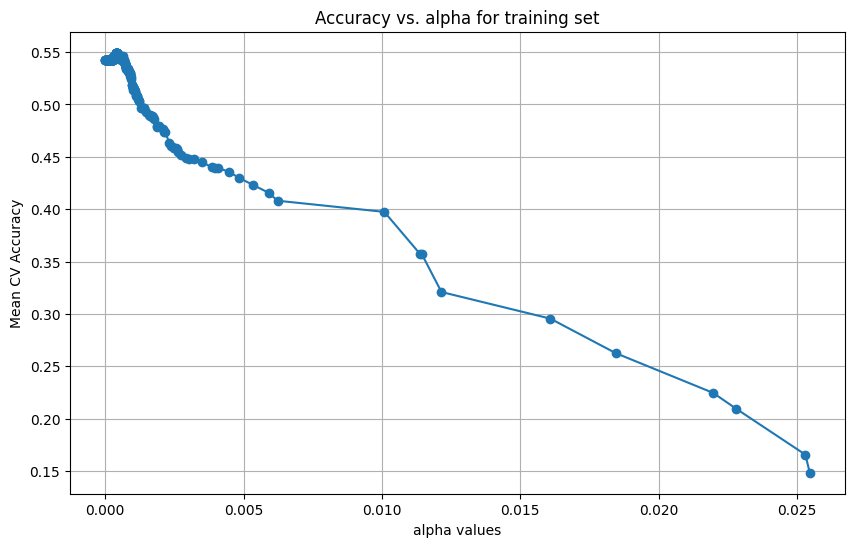

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, accuracy_scores, marker='o')
plt.xlabel("alpha values")
plt.ylabel("Mean CV Accuracy")
plt.title("Accuracy vs. alpha for training set")
plt.grid(True)
plt.show()

### Train the final pruned tree



Train a new Decision Tree Classifier using the optimal `ccp_alpha` found in the previous step on the entire training dataset. Based on the plot, a ccp_alpha around 0.025 looks reasonable.



In [ ]:
optimal_ccp_alpha = 0.025467522899355055 # Manually selected based on the plot
optimal_ccp_alpha = 0.01
pruned_tree_model = DecisionTreeClassifier(
    random_state=42,
    ccp_alpha=optimal_ccp_alpha
)

pruned_tree_model.fit(X_train_processed, y_train)
print(pruned_tree_model.get_depth())

10


### Evaluate the pruned tree


In [ ]:
def evaluate_pruned_tree(pruned_tree_model, X_test, y_test):
  X_test_processed = clf_pipeline.named_steps['preprocessor'].transform(X_test)
  test_accuracy_pruned = pruned_tree_model.score(X_test_processed, y_test)
  pruned_tree_depth = pruned_tree_model.get_depth()
  print(f"{pruned_tree_depth},{test_accuracy_pruned:.2f}")

Trained models evaluation

In [ ]:
print(f"Depth,Accuracy")
for ccp_alpha_candidate in ccp_alphas:
    dt_clf = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha_candidate)
    dt_clf.fit(X_train_processed, y_train)
    evaluate_pruned_tree(dt_clf, X_test, y_test)

Depth,Accuracy
69,0.55
69,0.55
69,0.55
69,0.55
69,0.55
69,0.55
69,0.55
69,0.55
69,0.55
69,0.55
69,0.55
69,0.55
69,0.55
69,0.55
69,0.55
69,0.55
69,0.55
69,0.55
69,0.55
69,0.55
69,0.55
69,0.55
69,0.55
69,0.55
69,0.55
69,0.55
69,0.55
69,0.55
69,0.55
69,0.55
69,0.55
69,0.55
69,0.55
69,0.55
69,0.55
69,0.55
69,0.55
69,0.55
69,0.55
69,0.55
69,0.55
69,0.55
69,0.55
69,0.55
69,0.56
69,0.56
69,0.56
69,0.56
69,0.56
69,0.56
69,0.56
69,0.56
69,0.56
69,0.56
69,0.56
69,0.56
69,0.56
69,0.56
69,0.56
69,0.56
69,0.56
69,0.56
69,0.56
69,0.56
69,0.56
69,0.56
69,0.56
69,0.56
69,0.56
69,0.56
69,0.56
69,0.56
69,0.56
69,0.56
69,0.56
69,0.55
69,0.55
69,0.55
69,0.55
69,0.55
69,0.55
69,0.55
69,0.55
69,0.55
69,0.55
69,0.55
69,0.55
69,0.55
69,0.55
69,0.55
69,0.55
69,0.55
69,0.55
69,0.55
69,0.55
69,0.55
69,0.55
69,0.55
69,0.55
69,0.55
69,0.55
69,0.55
69,0.55
69,0.55
69,0.55
69,0.55
69,0.55
69,0.55
69,0.55
69,0.55
69,0.55
69,0.55
69,0.55
69,0.55
69,0.55
69,0.55
69,0.55
69,0.55
69,0.55
69,0.55
69,0.55
69,0.55
69,0.55
6

# Deep exploratory data analysis


## Missing values check


Missing values per column:
Underwriter            0
Broker Grouping        0
Minor Class            2
Operating Territory    0
Renewal Ind            0
EPI Gross              0
Limit                  0
dtype: int64


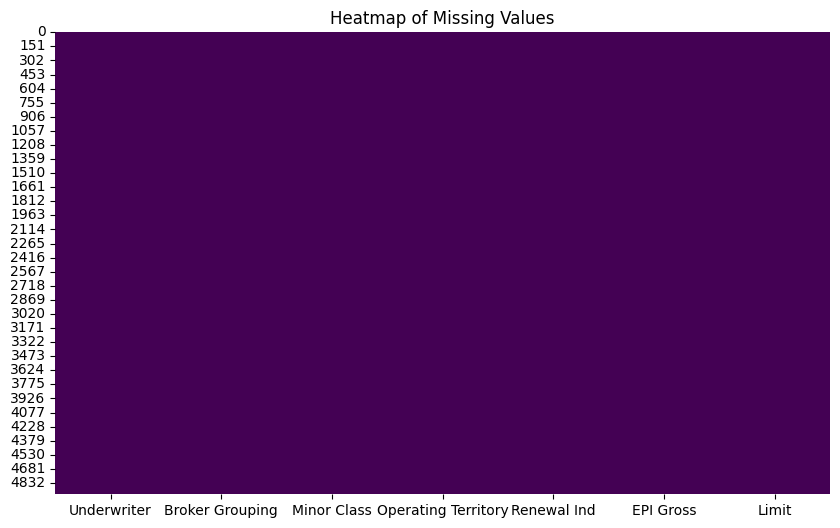

In [ ]:
import seaborn as sns

# Calculate missing values
missing_values = df.isnull().sum()

# Print missing values
print("Missing values per column:")
print(missing_values)

# Create a heatmap of missing values
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap of Missing Values')
plt.show()

## Data types


In [ ]:
df.info()
print("\nData Types:")
print(df.dtypes)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4954 entries, 0 to 4953
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Underwriter          4954 non-null   object 
 1   Broker Grouping      4954 non-null   object 
 2   Minor Class          4952 non-null   object 
 3   Operating Territory  4954 non-null   object 
 4   Renewal Ind          4954 non-null   object 
 5   EPI Gross            4954 non-null   object 
 6   Limit                4954 non-null   float64
dtypes: float64(1), object(6)
memory usage: 271.1+ KB

Data Types:
Underwriter             object
Broker Grouping         object
Minor Class             object
Operating Territory     object
Renewal Ind             object
EPI Gross               object
Limit                  float64
dtype: object


## Descriptive statistics

Distribution and outliers of numerical columns.


In [ ]:
numerical_cols = df.select_dtypes(include=['number'])
descriptive_stats = numerical_cols.describe()
display(descriptive_stats)

,Limit
count,4.954000e+03
mean,1.398969e+09
std,9.112456e+09
min,0.000000e+00
25%,0.000000e+00
50%,0.000000e+00
75%,1.000000e+08
max,3.560000e+11


## Categorical feature distributions


In [ ]:
for col in categorical_features:
    print(f"{col}")

Broker Grouping
Minor Class
Operating Territory
Renewal Ind


### Broker Grouping

In [ ]:
col = "Broker Grouping"
if X[col].nunique() > 20: # Limit to top 20 categories
    pd.set_option('display.max_rows', None)
    result = X[col].value_counts()
    display(result)
    pd.reset_option('display.max_rows')
else:
    result = X[col].value_counts()
    print(result)
print("\n")

,count
Broker Grouping,
MARSH,610
HOWDEN,500
AON,479
WILLIS,343
ARTHUR,295
LOCKTON,285
CHEDID,267
PRICE,211
AMWINS,112


### Minor Class

In [ ]:
col = "Minor Class"
if X[col].nunique() > 20: # Limit to top 20 categories
    pd.set_option('display.max_rows', None)
    result = X[col].value_counts()
    display(result)
    pd.reset_option('display.max_rows')
else:
    result = X[col].value_counts()
    print(result)
print("\n")

Minor Class
Sabotage and Terrorism          1959
Full PV                         1760
SRCCMD                           768
Active Assailant                 358
PV excluding War & Civil War      61
UK Terrorism                      44
Terrorism                          2
Name: count, dtype: int64




### Operating Territory

In [ ]:
col = "Operating Territory"
if X[col].nunique() > 20: # Limit to top 20 categories
    pd.set_option('display.max_rows', None)
    result = X[col].value_counts()
    display(result)
    pd.reset_option('display.max_rows')
else:
    result = X[col].value_counts()
    print(result)
print("\n")

,count
Operating Territory,
UnKnown,2680
India,235
United Kingdom,207
California,139
New York,83
South Africa,83
Pakistan,79
United Arab Emirates,72
Texas,43


### Renewal Ind

In [ ]:
col = "Renewal Ind"
if X[col].nunique() > 20: # Limit to top 20 categories
    pd.set_option('display.max_rows', None)
    result = X[col].value_counts()
    display(result)
    pd.reset_option('display.max_rows')
else:
    result = X[col].value_counts()
    print(result)
print("\n")

Renewal Ind
New        3545
Renewal    1409
Name: count, dtype: int64




## Correlation analysis



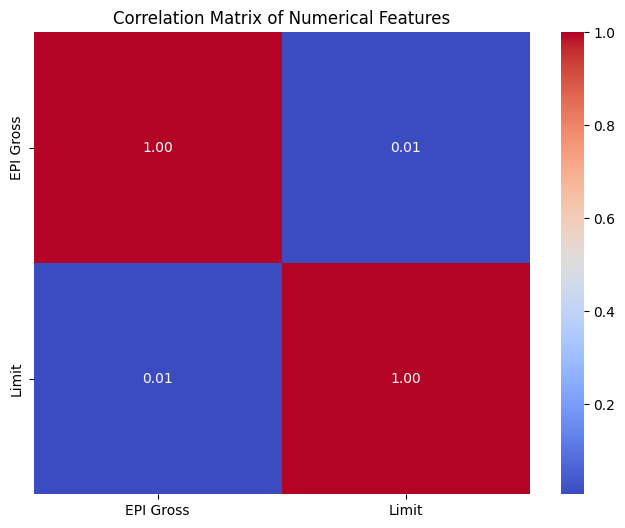

In [ ]:

import seaborn as sns
import matplotlib.pyplot as plt

for col in ['EPI Gross', 'Limit']:
    if col in X.columns:
        X[col] = X[col].astype(str).str.replace(',', '', regex=False)
        X[col] = pd.to_numeric(X[col], errors='coerce')
        X[col] = X[col].fillna(0)

numerical_df = X[numeric_features]
correlation_matrix = numerical_df.corr()


plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

There is a strong positive correlation (0.98) between 'EPI Gross' and 'Limit'.

## Analyze the relationship between features and target




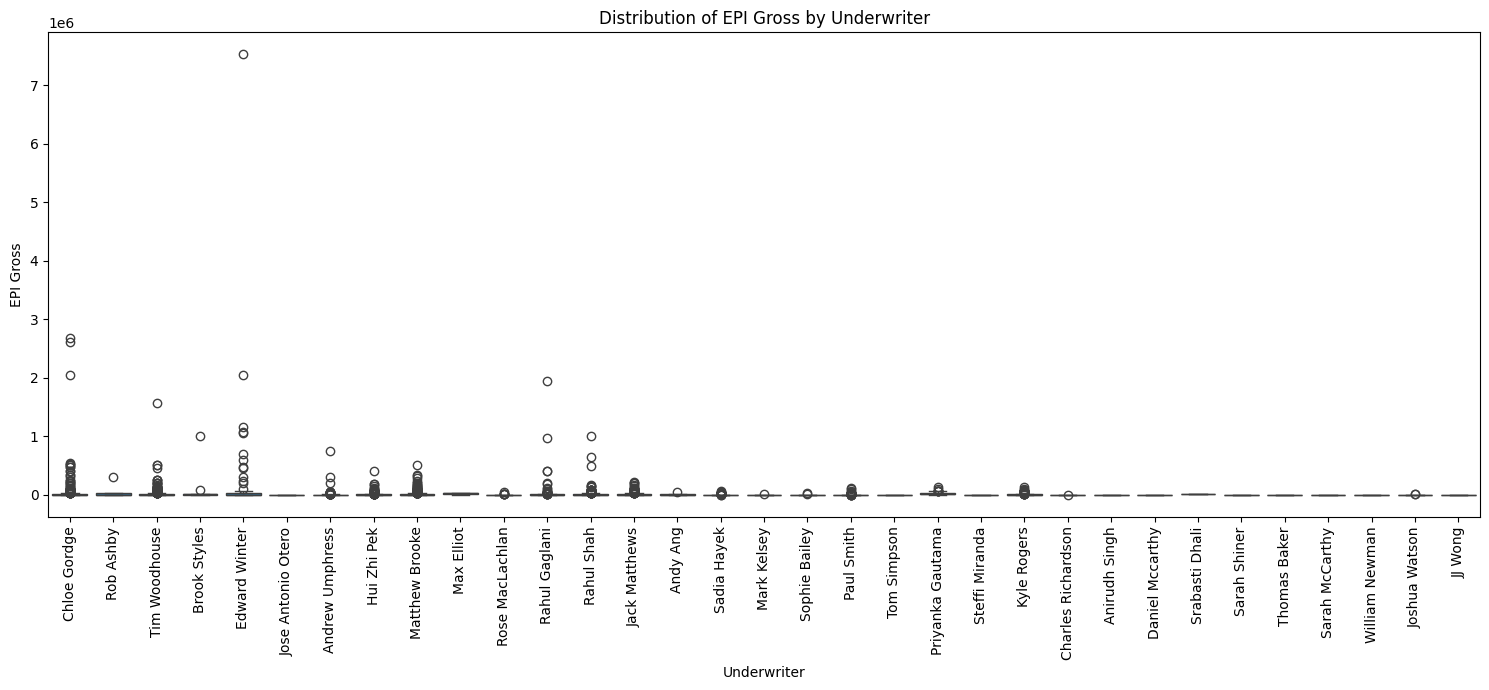

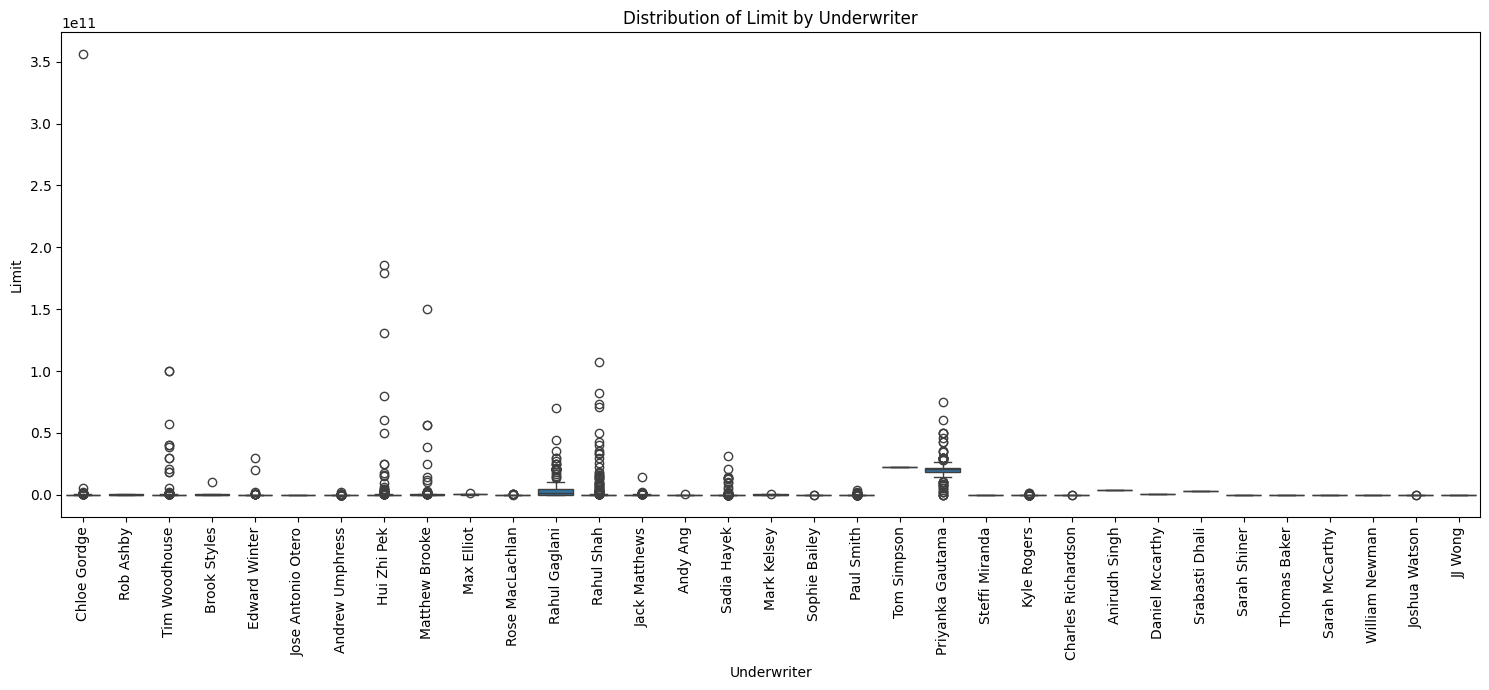

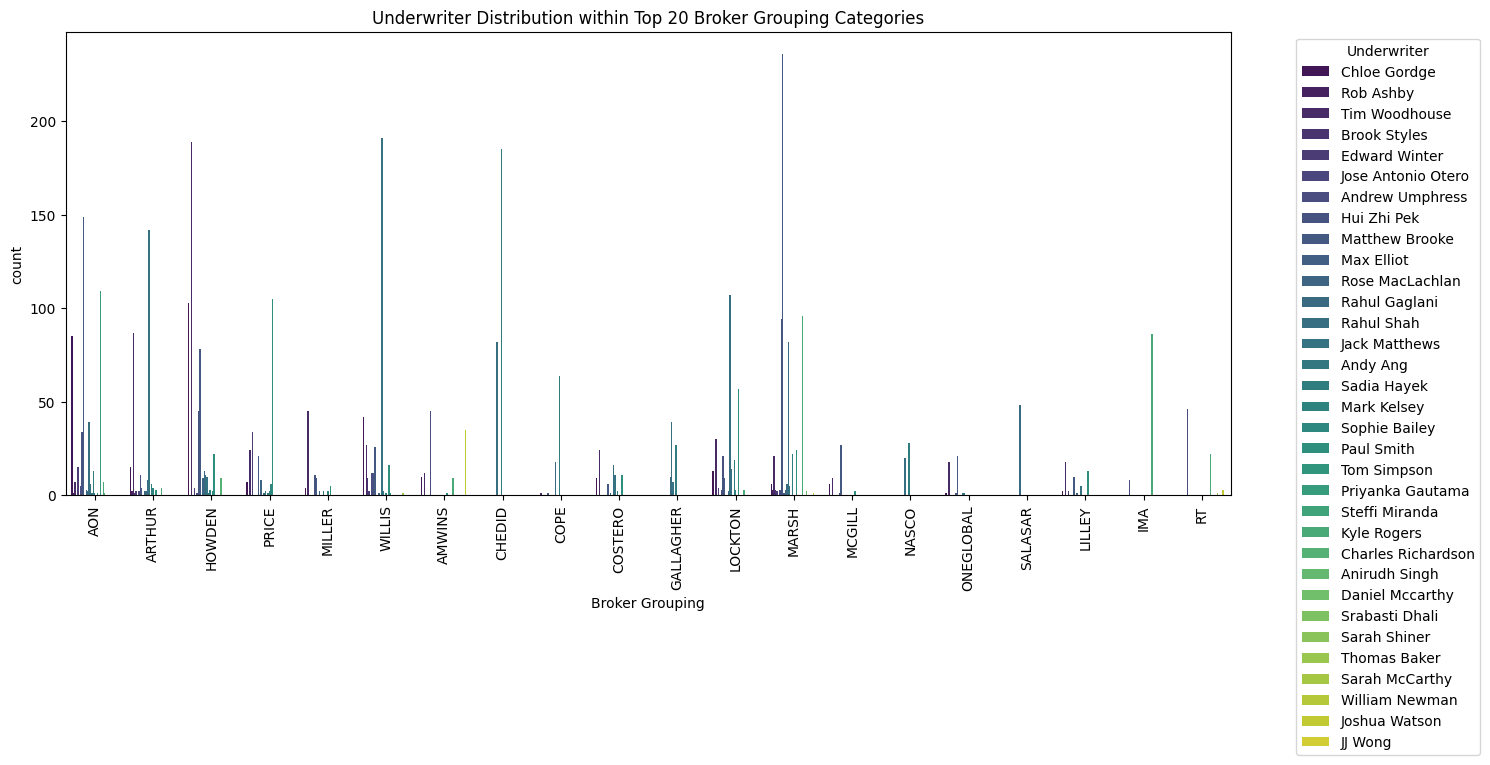

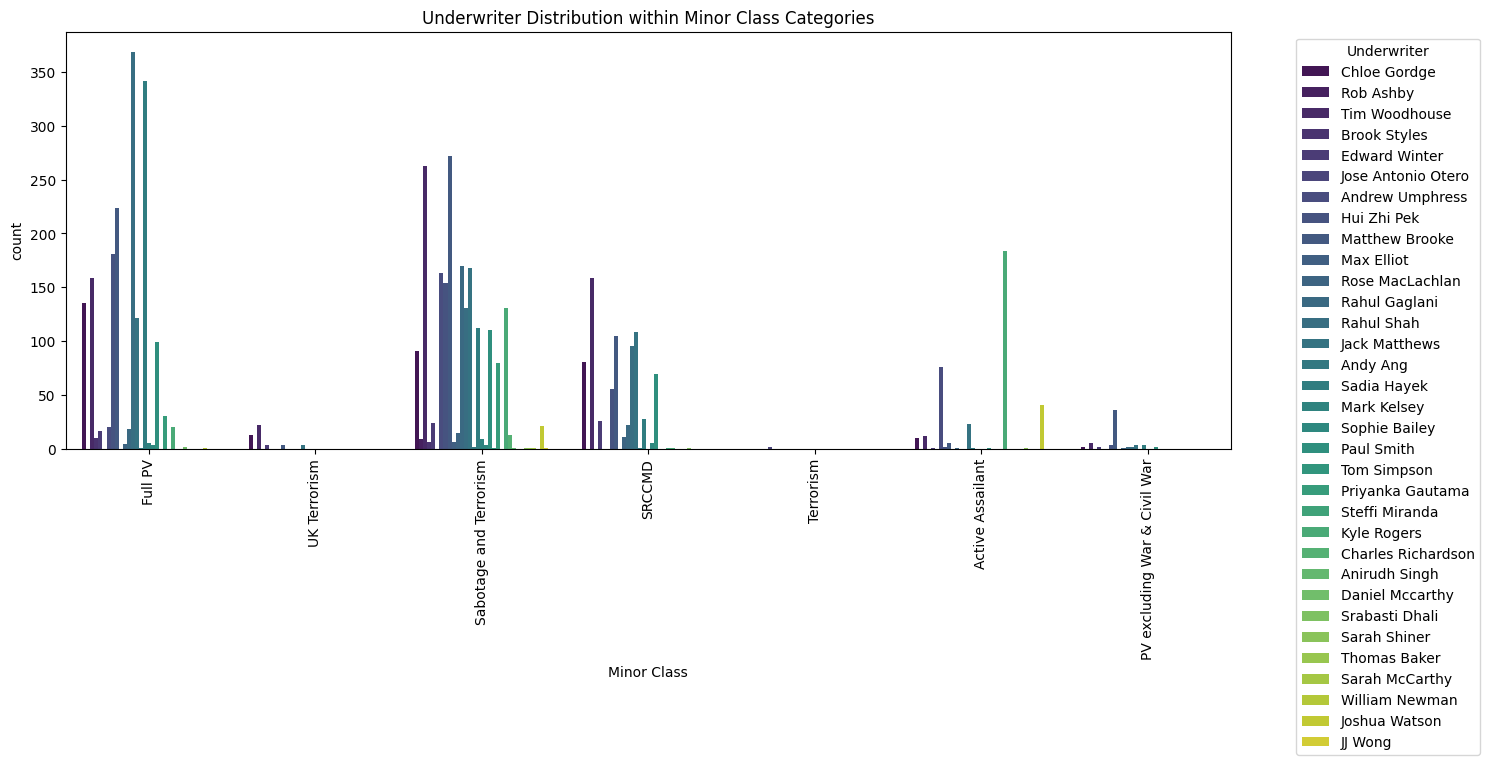

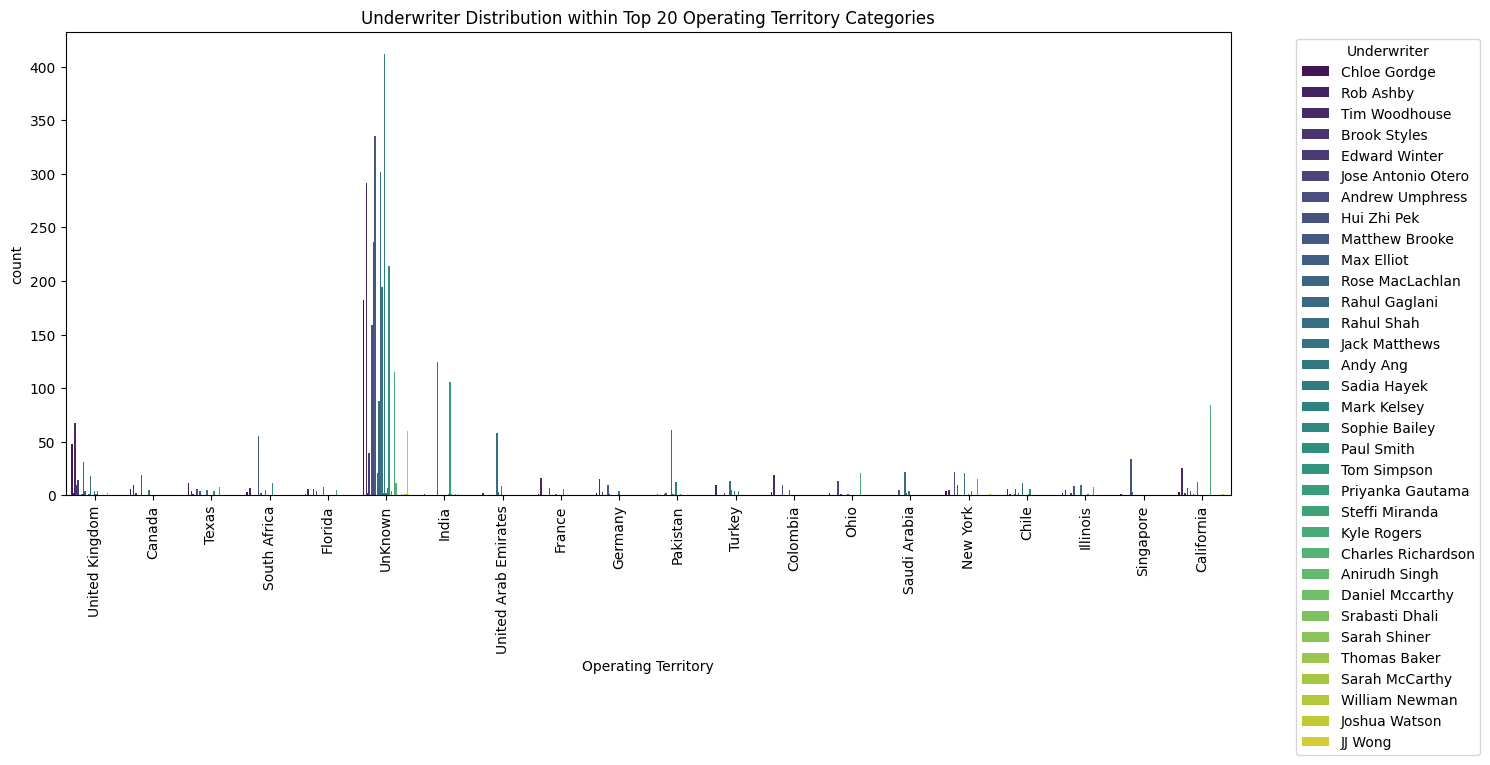

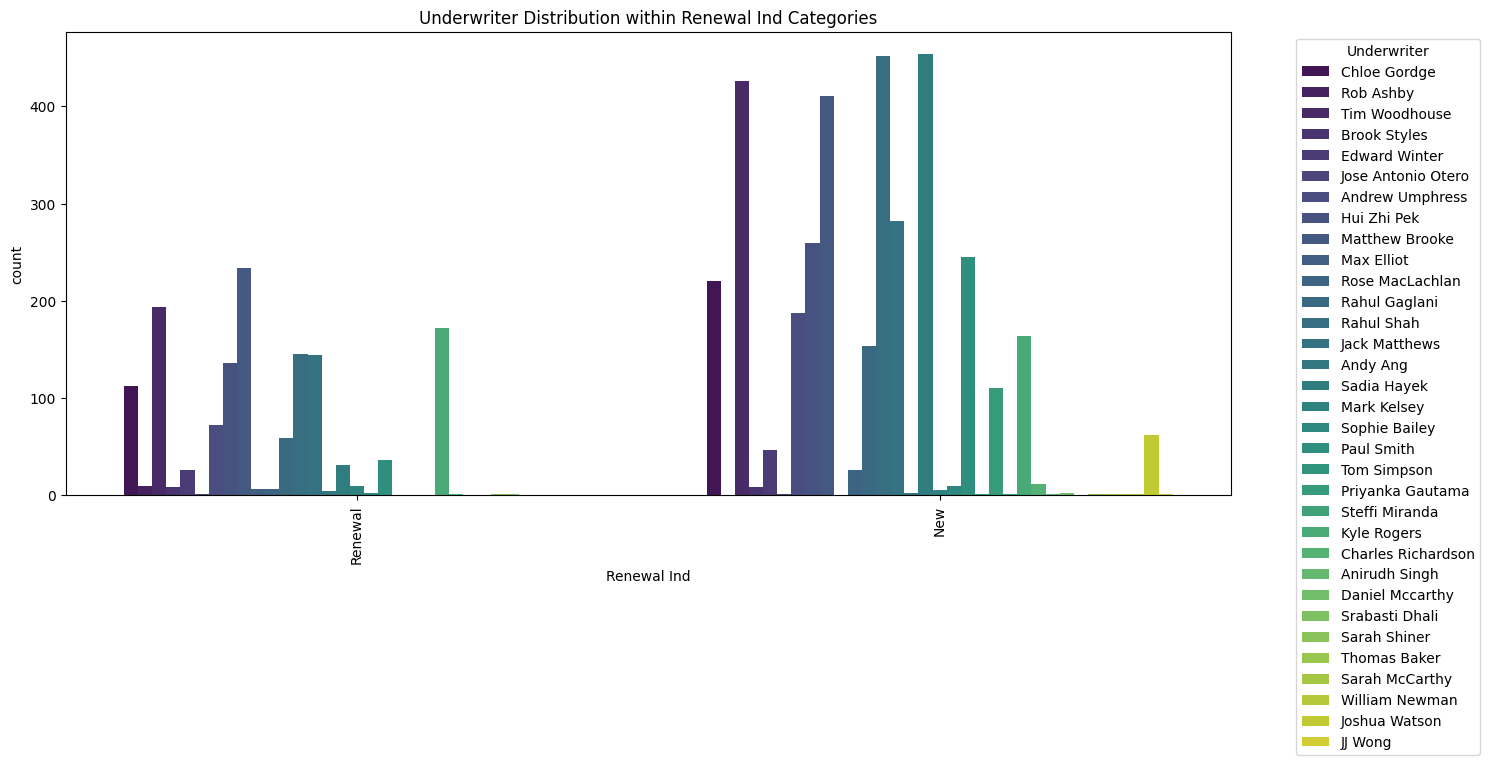

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Box plots for numerical features vs. Underwriter
for col in numeric_features:
    plt.figure(figsize=(15, 7))
    sns.boxplot(x=y, y=X[col])
    plt.title(f'Distribution of {col} by Underwriter')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

# 2. Stacked bar plots for categorical features vs. Underwriter
for col in categorical_features:
    plt.figure(figsize=(15, 7))
    if X[col].nunique() > 20: # Limit to top 20 for readability if many categories
        top_categories = X[col].value_counts().nlargest(20).index
        sns.countplot(x=col, hue=y, data=X[X[col].isin(top_categories)], palette='viridis')
        plt.title(f'Underwriter Distribution within Top 20 {col} Categories')
    else:
        sns.countplot(x=col, hue=y, data=X, palette='viridis')
        plt.title(f'Underwriter Distribution within {col} Categories')
    plt.xticks(rotation=90)
    plt.legend(title='Underwriter', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

### Statistical tests
ANOVA for numerical features vs. the categorical target and Chi-squared for categorical features vs. the categorical target.



In [ ]:
from scipy import stats

# Statistical tests
print("Statistical Tests for Feature-Underwriter Relationships:")

# ANOVA for numerical features vs. Underwriter
for col in numeric_features:
    # Create a list of arrays, one for each underwriter's values in the current numerical column
    groups = [X[col][y == underwriter].dropna() for underwriter in y.unique()]
    # Perform ANOVA test
    fvalue, pvalue = stats.f_oneway(*groups)
    print(f"ANOVA test for {col} vs. Underwriter: F-value={fvalue:.2f}, P-value={pvalue:.4f}")

# Chi-squared test for categorical features vs. Underwriter
for col in categorical_features:
    # Create a contingency table
    contingency_table = pd.crosstab(X[col], y)
    # Perform Chi-squared test
    chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
    print(f"Chi-squared test for {col} vs. Underwriter: Chi2-value={chi2:.2f}, P-value={p:.4f}")


Statistical Tests for Feature-Underwriter Relationships:
ANOVA test for EPI Gross vs. Underwriter: F-value=6.19, P-value=0.0000
ANOVA test for Limit vs. Underwriter: F-value=21.22, P-value=0.0000
Chi-squared test for Broker Grouping vs. Underwriter: Chi2-value=39923.68, P-value=0.0000
Chi-squared test for Minor Class vs. Underwriter: Chi2-value=8094.06, P-value=0.0000
Chi-squared test for Operating Territory vs. Underwriter: Chi2-value=17302.39, P-value=0.0000
Chi-squared test for Renewal Ind vs. Underwriter: Chi2-value=416.22, P-value=0.0000


This indicates a statistically significant relationship between ('EPI Gross', 'Limit', 'Broker Grouping', 'Minor Class', 'Operating Territory', 'Renewal Ind') and the 'Underwriter' target variable.

## Identify influential features

The most influential features for 'Underwriter'.


Most Influential Features for Underwriter:


,Feature,Importance
14,Broker Grouping_AON,0.110710
34,Broker Grouping_CHEDID,0.084736
259,Operating Territory_India,0.081614
186,Minor Class_Active Assailant,0.072174
374,Limit,0.064232
181,Broker Grouping_WILLIS,0.059382
17,Broker Grouping_ARTHUR,0.054486
373,EPI Gross,0.041119
78,Broker Grouping_HOWDEN,0.038636
190,Minor Class_Sabotage and Terrorism,0.037921


/tmp/ipython-input-1639667563.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10), palette='viridis')


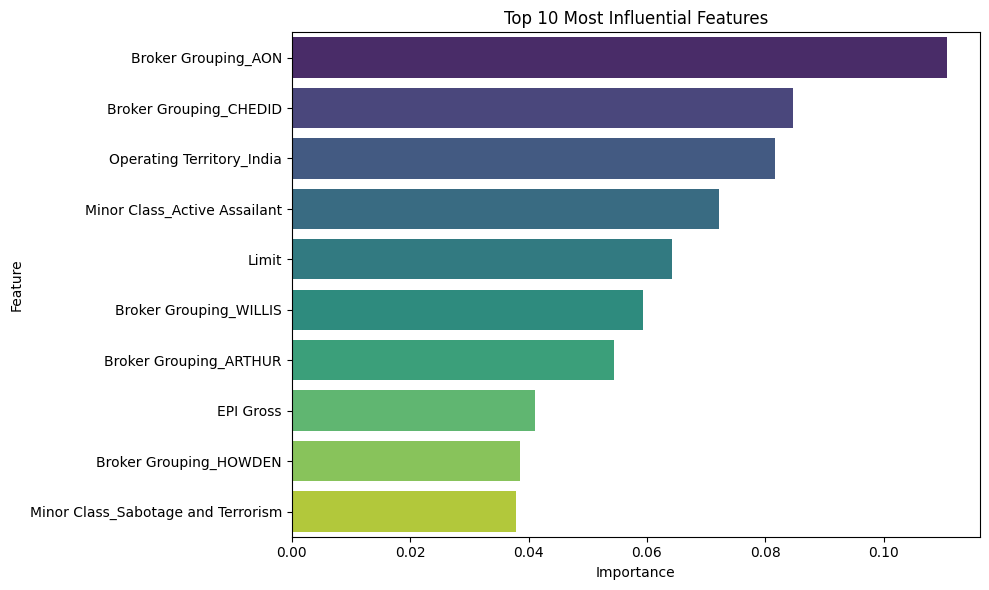

In [ ]:
# Get feature importances from the trained Decision Tree model
feature_importances = clf_pipeline.named_steps['classifier'].feature_importances_

feature_importance_df = pd.DataFrame({
    'Feature': all_feature_names,
    'Importance': feature_importances
})

# Sort features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print("Most Influential Features for Underwriter:")
display(feature_importance_df.head(10))

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10), palette='viridis')
plt.title('Top 10 Most Influential Features')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()